In [2]:
import pandas as pd
file_path = r'F:\Air_India\Data\AI_reviews.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Newark to Chennai via Mumba...
1,1,✅ Trip Verified | At 0:39 in the morning you a...
2,2,✅ Trip Verified | Had one of the worst experi...
3,3,"Not Verified | Bad treatment, took Air India ..."
4,4,✅ Trip Verified | Requested a gluten free mea...
...,...,...
995,995,Udaipur to New Delhi. The flight left 30 minut...
996,996,Bom-Jaipur-Bom on A319. I was surprised to rec...
997,997,Travelled 11th April 2014 was very disappointe...
998,998,BOM-DEL-SYD we reach domestic airport by 7 am ...


In [4]:
# Data cleaning function
def clean_review(review):
    # Remove special characters like âœ…
    review = review.encode("ascii", "ignore").decode("utf-8")

    # Remove extra whitespaces and newlines
    review = " ".join(review.split())

    # Convert to lowercase
    review = review.lower()

    return review

# Apply the cleaning function to the 'reviews' column
df["reviews"] = df["reviews"].apply(clean_review)

# Save the cleaned DataFrame back to CSV
cleaned_file_path = r'F:\Air_India\Data\AI_reviews.csv'
df.to_csv(cleaned_file_path, index=False)

print("Data has been cleaned and saved to:", cleaned_file_path)

Data has been cleaned and saved to: F:\Air_India\Data\AI_reviews_cleaned.csv


In [5]:
df

,Unnamed: 0,reviews
0,0,"trip verified | newark to chennai via mumbai, ..."
1,1,trip verified | at 0:39 in the morning you are...
2,2,trip verified | had one of the worst experienc...
3,3,"not verified | bad treatment, took air india f..."
4,4,trip verified | requested a gluten free meal a...
...,...,...
995,995,udaipur to new delhi. the flight left 30 minut...
996,996,bom-jaipur-bom on a319. i was surprised to rec...
997,997,travelled 11th april 2014 was very disappointe...
998,998,bom-del-syd we reach domestic airport by 7 am ...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                       cleaned_reviews  sentiment_score
0    trip verified | newark to chennai via mumbai, ...           0.9555
1    trip verified | at 0:39 in the morning you are...          -0.6310
2    trip verified | had one of the worst experienc...          -0.7731
3    not verified | bad treatment, took air india f...          -0.4005
4    trip verified | requested a gluten free meal a...           0.6249
..                                                 ...              ...
995  udaipur to new delhi. the flight left 30 minut...           0.8100
996  bom-jaipur-bom on a319. i was surprised to rec...           0.9628
997  travelled 11th april 2014 was very disappointe...          -0.5714
998  bom-del-syd we reach domestic airport by 7 am ...           0.8877
999  melbourne to delhi. the new dreamliner 788 is ...           0.9965

[1000 rows x 2 columns]
Top Topics:
Topic 0: 0.077*"." + 0.031*"," + 0.014*"flight" + 0.013*"air" + 0.012*"india" + 0.007*"verified" + 

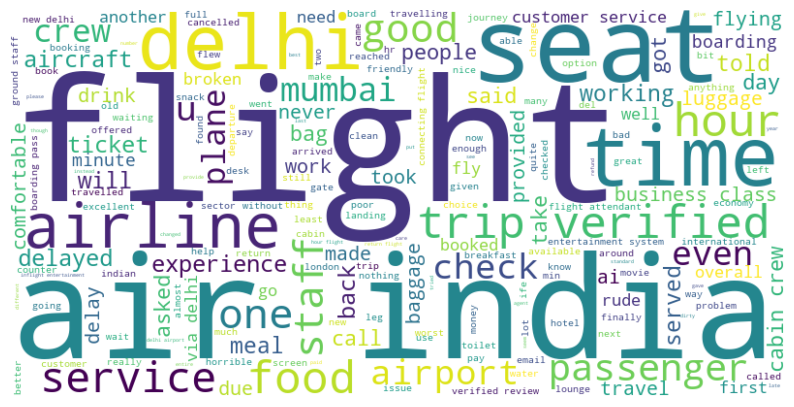

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Data Cleaning
def clean_review(review):
    # Remove special characters like âœ…
    review = review.encode("ascii", "ignore").decode("utf-8")

    # Remove extra whitespaces and newlines
    review = " ".join(review.split())

    # Convert to lowercase
    review = review.lower()

    return review

# Read the CSV file into a DataFrame
file_path = r'F:\Air_India\Data\AI_reviews.csv'
df = pd.read_csv(file_path)

# Clean the 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

# Step 2: Text Analysis
# Sentiment Analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Topic Modeling (LDA)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
texts = [word_tokenize(review) for review in df['cleaned_reviews']]
texts_filtered = [[word for word in text if word not in stop_words] for text in texts]

dictionary = corpora.Dictionary(texts_filtered)
corpus = [dictionary.doc2bow(text) for text in texts_filtered]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary)

# Generate Word Clouds
all_text = ' '.join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display Sentiment Analysis Results
print(df[['cleaned_reviews', 'sentiment_score']])

# Display Top Topics from Topic Modeling
print("Top Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
df['sentiment_score']

0      0.9555
1     -0.6310
2     -0.7731
3     -0.4005
4      0.6249
        ...  
995    0.8100
996    0.9628
997   -0.5714
998    0.8877
999    0.9965
Name: sentiment_score, Length: 1000, dtype: float64

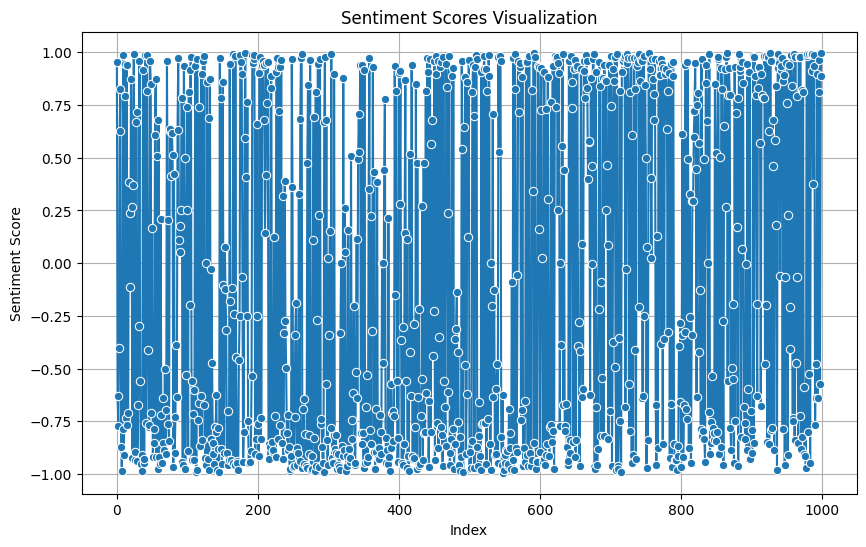

In [15]:
import seaborn as sns

sentiment_scores = df['sentiment_score']

# Create a list of indices for the x-axis
indices = range(len(sentiment_scores))

# Create a DataFrame for plotting using Seaborn
data = pd.DataFrame({'Index': indices, 'Sentiment Score': sentiment_scores})

# Plot sentiment scores using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Index', y='Sentiment Score', data=data, marker='o')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores Visualization')
plt.grid(True)
plt.show()


In [22]:
threshold = 0.2

# Count the number of negative reviews
num_negative_reviews = df[df['sentiment_score'] < threshold].shape[0]

# Display the result
print("Number of negative reviews:", num_negative_reviews)


Number of negative reviews: 591


In [21]:
threshold = 0.2

# Count the number of positive reviews
num_positive_reviews = df[df['sentiment_score'] > threshold].shape[0]

# Display the result
print("Number of positive reviews:", num_positive_reviews)

Number of positive reviews: 409
